In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import matplotlib.gridspec as gridspec
import plotly.graph_objs as graphObj
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [30]:
videos = pd.read_csv('USvideos.csv',encoding='utf8',error_bad_lines = False);#opening the file USvideos

columns = ['video_id', 'title', 'channel_title', 'category_id',
          'tags', 'views', 'likes', 'dislikes', 'comment_total',
          'thumbnail_link', 'date']
us_vid_df =  pd.read_csv("USvideos.csv", usecols = columns)
comm = pd.read_csv('UScomments.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments


b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [31]:
pol=[] # list which will contain the polarity of the comments
print(comm)
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

           video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691395  EoejGgUNmVU                                             Лучшая     1   
691396  EoejGgUNmVU  qu'est ce que j'aimerais que tu viennes à Roan...     0   
691397  EoejGgUNmVU                          Ven a mexico! 😍 te amo LP     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   
691399  EoejGgUNmVU  Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...     0   

       replies  
0            0  
1    

In [32]:
comm['pol']=pol

comm['pol'][comm.pol==0]= 0

comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

c:\users\bhami\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\bhami\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\bhami\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df_positive = comm[comm.pol==1]
df_positive.head()

video_id                                       comment_text likes  \
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
15  XpVt6Z1Gjjo                       He happy cause he in a movie     0   
18  XpVt6Z1Gjjo  It's been fun watching you grow. I'm at 42 day...     3   

   replies  pol  
8        0  1.0  
11       0  1.0  
13       0  1.0  
15       0  1.0  
18       0  1.0

# Word Cloud for positive sentences

(-0.5, 999.5, 499.5, -0.5)

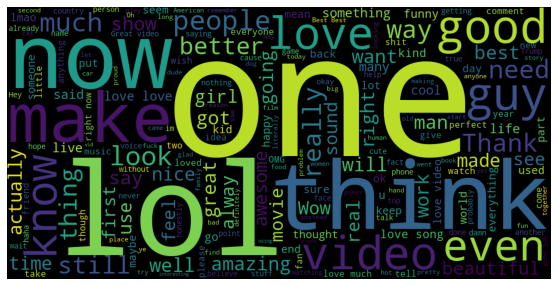

In [34]:
k= (' '.join(df_positive['comment_text']))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Word Cloud for negative sentences


(-0.5, 999.5, 499.5, -0.5)

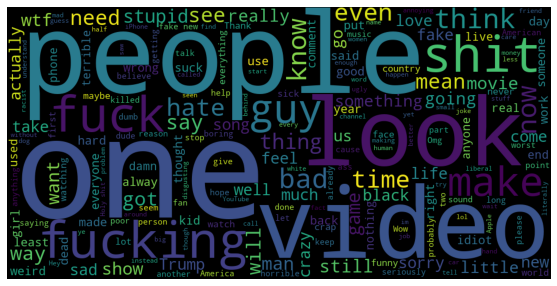

In [35]:
df_negative = comm[comm.pol==-1]
k= (' '.join(df_negative['comment_text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Number of Type of Comments

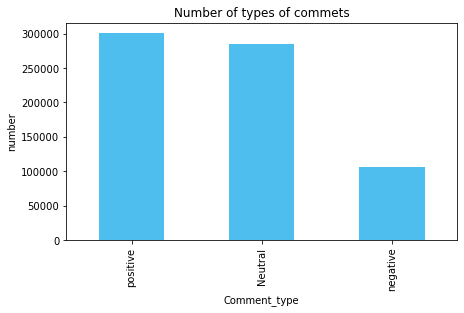

In [36]:
comm['pol'].replace({1:'positive',0:'Neutral',-1:'negative'}).value_counts().plot(kind='bar',figsize=(7,4), color=[0.3010, 0.7450, 0.9330]);
plt.title('Number of types of commets');
plt.xlabel('Comment_type');
plt.ylabel('number');

# unique_id and the info about its comment

In [37]:
id=[]
pos_comm=[]
neg_comm=[]
neutral_comm =[]
for i in set(comm.video_id):
    id.append(i)
    try:
        pos_comm.append(comm[comm.video_id==i].pol.value_counts()[1])
    except:
        pos_comm.append(0)
    try:    
        neg_comm.append(comm[comm.video_id==i].pol.value_counts()[-1])
    except:
        neg_comm.append(0)
    try:    
        neutral_comm.append(comm[comm.video_id==i].pol.value_counts()[0])
    except:
        neutral_comm.append(0)

In [38]:
df_unique = pd.DataFrame(id)
df_unique.columns=['id']
df_unique['pos_comm'] =pos_comm
df_unique['neg_comm'] = neg_comm
df_unique['neutral_comm'] = neutral_comm
df_unique['total_comments']=df_unique['pos_comm']+df_unique['neg_comm']+df_unique['neutral_comm']
df_unique.head(6)

id  pos_comm  neg_comm  neutral_comm  total_comments
0  S6Mnl6kocLw       141       106           153             400
1  Lwn97mpBCu8       296       106           198             600
2  5PaDeyRNUyc       285       127           188             600
3  tqUKbEfW-B8       134        79           187             400
4  abeF5zQbQEM       214        55           331             600
5  iv1C0pEdhOg       127        55           118             300

In [39]:
df_unique.to_csv('unique.csv',index=False,)

In [40]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [41]:
comm.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  pol  
0       0  0.0  
1       0  0.0  
2       0  0.0  
3       0  0.0  
4       0  0.0

In [42]:
videos.date.value_counts()

12.10    200
4.10     200
20.10    200
5.10     200
18.10    200
15.10    200
16.10    200
29.09    200
1.10     200
14.10    200
11.10    200
23.09    200
15.09    200
2.10     200
21.09    200
14.09    200
13.10    200
17.09    200
21.10    200
3.10     200
22.10    200
16.09    200
19.10    200
10.10    200
17.10    200
7.10     200
30.09    200
28.09    200
13.09    200
22.09    200
8.10     200
20.09    200
19.09    200
6.10     200
18.09    200
25.09    199
24.09    199
27.09    199
26.09    199
9.10     196
Name: date, dtype: int64

In [43]:
print(videos.video_id.value_counts()[:12]) # these videos have become 7 times the most trending videos of these 2 weeks.
most_trending = videos.video_id.value_counts()[:12].index

Oo0NJsr5m4I    8
Hlt3rA-oDao    8
LunHybOKIjU    8
UXdbCReBTR8    7
mlxdnyfkWKQ    7
74zJ4scJzNs    7
sjlHnJvXdQs    7
oKzFGhlFqqE    7
CYoRmfI0LUc    7
4X6a3G_0HjY    7
iALfvFpcItE    7
DeTu8xSGpEM    7
Name: video_id, dtype: int64


In [44]:
videos[videos.video_id=='mlxdnyfkWKQ']

video_id                    title  channel_title  category_id  \
1647  mlxdnyfkWKQ  Bear in Russian traffic  Niks Ļeoņenko           23   
1650  mlxdnyfkWKQ  Bear in Russian traffic  Niks Ļeoņenko           23   
1855  mlxdnyfkWKQ  Bear in Russian traffic  Niks Ļeoņenko           23   
2129  mlxdnyfkWKQ  Bear in Russian traffic  Niks Ļeoņenko           23   
2337  mlxdnyfkWKQ  Bear in Russian traffic  Niks Ļeoņenko           23   
2561  mlxdnyfkWKQ  Bear in Russian traffic  Niks Ļeoņenko           23   
2790  mlxdnyfkWKQ  Bear in Russian traffic  Niks Ļeoņenko           23   

                                                   tags   views  likes  \
1647                                             [none]   93109   1642   
1650                                             [none]   93153   1644   
1855                                             [none]  115720   1747   
2129                                             [none]  135303   1781   
2337                                             [none]  141666   1790   
2561  scary|funny|russia|prikol|car|traffic|sidecar|...  161606   1823   
2790  scary|funny|russia|prikol|car|traffic|sidecar|...  201549   1944   

      dislikes  comment_total                                  thumbnail_link  \
1647        86            307  https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg   
1650        86            307  https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg   
1855        89            313  https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg   
2129        92            252  https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg   
2337        94            254  https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg   
2561        97            257  https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg   
2790       101            260  https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg   

       date  
1647  21.09  
1650  21.09  
1855  22.09  
2129  23.09  
2337  24.09  
2561  25.09  
2790  26.09

# Tags 

(-0.5, 999.5, 499.5, -0.5)

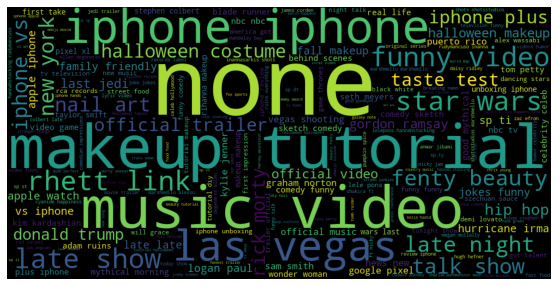

In [45]:
# slpitting the tags
tags = videos['tags'].map(lambda k: k.lower().split('|')).values 

# joining and making a complete list
k= (' '.join(videos['tags']))  
wordcloud = WordCloud(width = 1000, height = 500).generate((' '.join(k.lower().split('|'))))# word cloud


plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [46]:
unique = pd.read_csv('unique.csv',)

In [47]:
unique.sort_values(by='pos_comm',ascending=False).head(5)

id  pos_comm  neg_comm  neutral_comm  total_comments
1619  eERPlIdPJtI       426        32           142             600
1942  Zmi9iQp6944       411        55            34             500
1453  udnGW3E1vxY       404        51           242             697
806   xTyTQgb-y-A       401        40           127             568
1061  zKriLekFPwg       399        46           255             700

# 'Weight Update: 6 weeks Post Surgery! 93 pounds!' have very large number of positive reviews

In [48]:
videos[videos.video_id == 'eERPlIdPJtI'].title[225]

'Weight Update: 6 weeks Post Surgery! 93 pounds!'

# Mean of Positive Comments

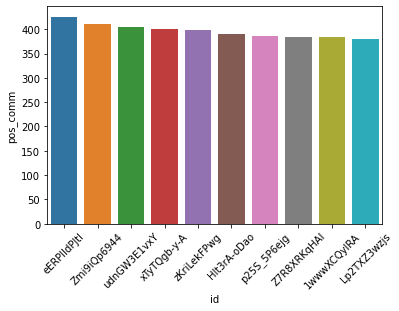

<Figure size 360x288 with 0 Axes>

In [49]:
sns.barplot(data=unique.sort_values(by='pos_comm',ascending=False).head(10),x='id',y='pos_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

# Mean of Negative Comments

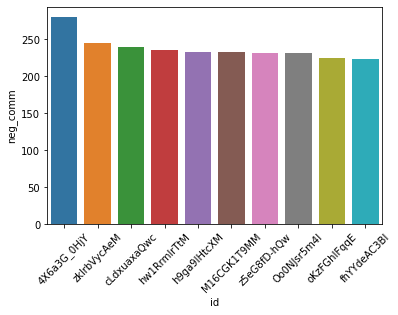

<Figure size 360x288 with 0 Axes>

In [50]:
sns.barplot(data=unique.sort_values(by='neg_comm',ascending=False).head(10),x='id',y='neg_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

# Total Comments

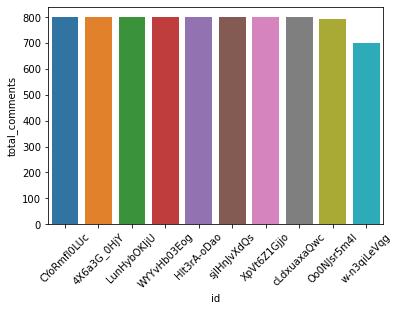

<Figure size 360x288 with 0 Axes>

In [51]:
sns.barplot(data=unique.sort_values(by='total_comments',ascending=False).head(10),x='id',y='total_comments')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

# Regression plot for Likes and Views

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

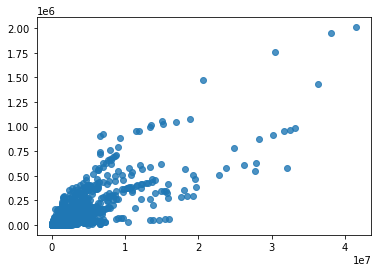

In [52]:
sns.regplot(data=videos,x='views',y='likes');
plt.title("Regression plot for likes & views");

# Regression plot for Dislikes and Views

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

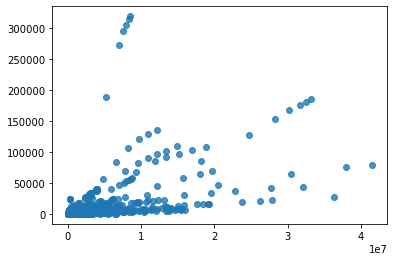

In [53]:
sns.regplot(data=videos,x='views',y='dislikes');
plt.title("Regression plot for dislikes & views");

# Correlation matrix is the evidence of above analysis!

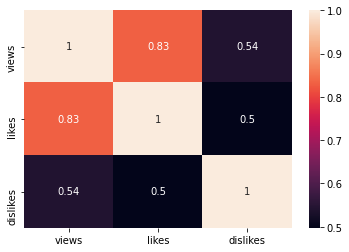

In [54]:
df_corr = videos[['views','likes','dislikes']]

sns.heatmap(df_corr.corr(),annot=True)

# Correlation between Views, Likes, Dislikes and Comments

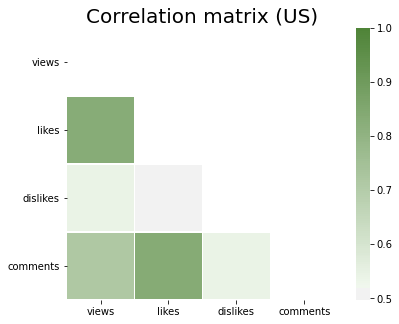

In [55]:
us_vid_df.rename(columns={'comment_total':'comments'}, inplace=True)
corr_us = us_vid_df.loc[:,['views', 'likes', 'dislikes', 'comments']].corr()

mask = np.zeros_like(corr_us, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(14, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])
cmap = sns.diverging_palette(196, 120, as_cmap=True)


ax2 = plt.subplot(gs[0,1])
ax1 = sns.heatmap(corr_us, cmap=cmap, vmax=1, center=0.5,
                  square=True, linewidths=.5, mask=mask)
ax2.set_title('Correlation matrix (US)', fontsize=20)
plt.yticks(rotation=0)

plt.show()

# Plotting Views, Comments, Likes and Dislikes for whole period of database

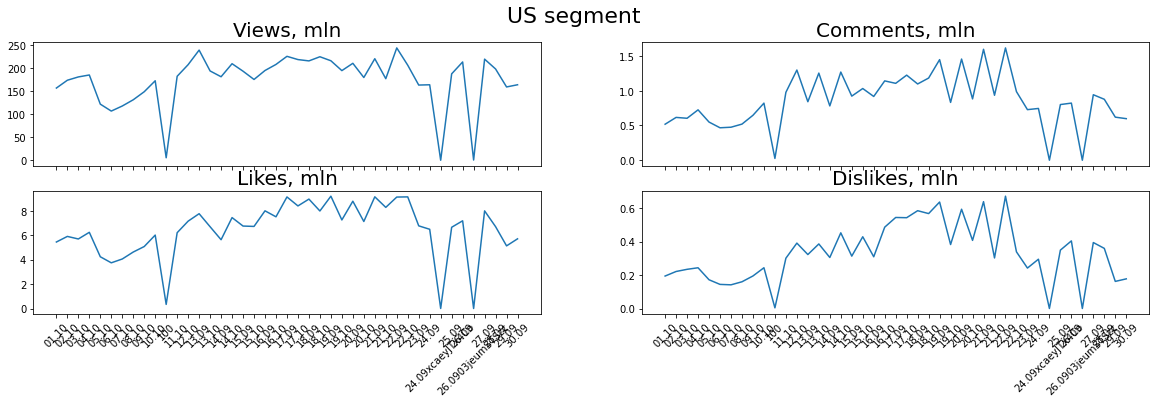

In [58]:
df = us_vid_df[['date','views', 'likes',
             'dislikes','comments']].groupby('date', as_index = False).sum()
df[['views','likes', 'dislikes','comments']] = df[['views', 'likes',
                                                   'dislikes', 'comments']].apply(lambda x: x/1000000)
fig = plt.figure(figsize=(20, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1])

ax1 = plt.subplot(gs[0,0])
ax1.plot(df['date'], df['views'])
ax1.set_xticklabels("")
ax1.set_title('Views, mln', fontsize=20)

ax2 = plt.subplot(gs[0,1])
ax2.plot(df['date'], df['comments'])
ax2.set_xticklabels("")
ax2.set_title('Comments, mln', fontsize=20)

ax3 = plt.subplot(gs[1,0])
ax3.plot(df['date'], df['likes'])
ax3.set_xticks(df['date'].values)
ax3.set_xticklabels(df['date'], rotation=45)
ax3.set_title('Likes, mln', fontsize=20)

ax4 = plt.subplot(gs[1,1])
ax4.plot(df['date'], df['dislikes'])
ax4.set_xticks(df['date'].values)
ax4.set_xticklabels(df['date'], rotation=45)
ax4.set_title('Dislikes, mln', fontsize=20)

plt.suptitle('{} segment'.format('US'), fontsize=22)

plt.show()

# Analysis on Emojis in comments

In [59]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
comm['emoji'] = comm['comment_text'].apply(lambda x: re.findall(emoji_pattern, str(x)))

comm['emoji'] = comm['emoji'].apply(lambda x: [i for sublist in x for i in sublist])

emo_list = comm['emoji'].values.tolist()
emo_list_flatten = [i for sublist in emo_list for i in sublist]

# only unique values from the list
emo_unique = list(set(emo_list_flatten))
emo_all = " ".join(emo_list_flatten)

In [60]:
emo_dict = {}
for i in emo_unique:
    emo_dict[i] = len(re.findall(i, emo_all))

In [61]:
emo_df = pd.DataFrame.from_dict(emo_dict, orient = 'index')
emo_df = emo_df.reset_index()
emo_df.columns = ["emoji", 'frequency']
emo_df.sort_values('frequency', ascending = False, inplace = True)
emo_df_top15 = emo_df.head(15).copy()
emo_df_top15.sort_values('frequency', ascending = False, inplace = True)

# plot
data = [graphObj.Bar(x = emo_df_top15['emoji'],
               y = emo_df_top15['frequency'],
               orientation = 'v',
               marker = dict(color = 'rgba(110, 160, 1, 0.7)',
                             line = dict(color = 'rgba(196, 120, 2, 1.0)',
                                         width = 1)))]

layout = dict(title = 'Top 15 most frequent emojis')
fig = dict(data = data, layout = layout)
iplot(fig, filename='basic-bar')

# Polarity of a Video

Reading the JSON to merge videos into the database

In [62]:
f = open("US_category_id.json")
data = f.read()
f.close()
out = json.loads(data)
categories = pd.DataFrame([
    {'category_id':x['id'],
     'category':x['snippet']['title'],
     'assignable':x['snippet']['assignable']
    } for x in out['items']
])

In [63]:
categories.head()
categories['category_id'] = categories['category_id'].astype(int)

In [64]:
videos['category_id'] = videos['category_id'].astype(int)
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [65]:
videos['date'] =  pd.to_datetime(videos['date'], errors='coerce', format="%d.%m")

In [66]:
videos=videos.merge(categories, on='category_id')

In [67]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

In [68]:
comm['polarity']=comm['comment_text'].apply(sentiment_calc)

In [69]:
def pol2sent(pol):
    if pol<=-.5:
        return "Very negative"
    if pol>-.5 and pol<0:
        return "Negative"
    if pol == 0:
        return "Neutral"
    if pol > 0 and pol<0.5:
        return "Positive"
    if pol>=0.5:
        return "Very positive"

In [70]:
def grouped_weighted_avg(values, weights, by):
    return (values * weights).groupby(by).sum() / weights.groupby(by).sum()

In [71]:
Videosentiment = comm.groupby("video_id").mean()
Videosentiment['Video_id'] = Videosentiment.index
#print(Videosentiment.columns)
Videosentiment.head()

pol  polarity     Video_id
video_id                                    
--JinobXWPk  0.110000  0.046776  --JinobXWPk
-1fzGnFwz9M  0.360000  0.137792  -1fzGnFwz9M
-3AGlBYyLjo -0.750000 -0.306250  -3AGlBYyLjo
-5sCWsLlTCI  0.164179  0.096262  -5sCWsLlTCI
-6Zc8Co2H3w  0.415000  0.230334  -6Zc8Co2H3w

In [72]:
videos=videos.merge(Videosentiment, on="video_id")

In [73]:
videos['videosentiment']=videos['polarity'].apply(pol2sent)

In [74]:
Videosentiment['sentiment']=Videosentiment['polarity'].apply(pol2sent)
Videosentiment.to_csv('video_comments_aggregated_sentiment.csv')

In [75]:
videos = videos.loc[:,~videos.columns.duplicated()]
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
2  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
3  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
4  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1  Logan Paul Vlogs           24   
2  Logan Paul Vlogs           24   
3  Logan Paul Vlogs           24   
4  Logan Paul Vlogs           24   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  logan paul vlog|logan paul|logan|paul|olympics...  5457497  349857   
2  logan paul vlog|logan paul|logan|paul|olympics...  5854127  361422   
3  logan paul vlog|logan paul|logan|paul|olympics...  5997736  366401   
4  logan paul vlog|logan paul|logan|paul|olympics...  6109026  369963   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     17479          52483  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
2     22023          54671  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
3     22885          39626  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
4     23207          38850  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   

  date       category  assignable      pol  polarity     Video_id  \
0  NaT  Entertainment        True  0.11375  0.068331  XpVt6Z1Gjjo   
1  NaT  Entertainment        True  0.11375  0.068331  XpVt6Z1Gjjo   
2  NaT  Entertainment        True  0.11375  0.068331  XpVt6Z1Gjjo   
3  NaT  Entertainment        True  0.11375  0.068331  XpVt6Z1Gjjo   
4  NaT  Entertainment        True  0.11375  0.068331  XpVt6Z1Gjjo   

  videosentiment  
0       Positive  
1       Positive  
2       Positive  
3       Positive  
4       Positive

# Analysis of Number of Comments

category
Autos & Vehicles         1540.400000
Comedy                   5943.466667
Education                2407.269663
Entertainment            4078.777293
Film & Animation         3355.185567
Gaming                   4292.407407
Howto & Style            3673.611538
Music                    7454.905775
News & Politics          1676.120000
Nonprofits & Activism      45.500000
People & Blogs           4296.369919
Pets & Animals           2082.081081
Science & Technology     2627.298611
Shows                      37.000000
Sports                   1630.863309
Travel & Events          1336.588235
Name: comment_total, dtype: float64


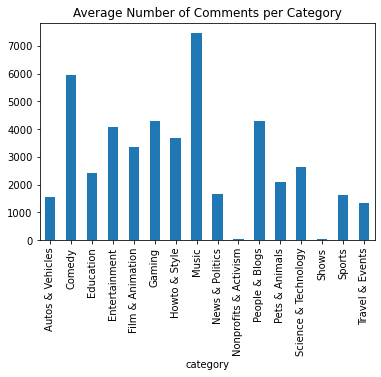

In [77]:
video_Last = videos.sort_values('likes', ascending=False).drop_duplicates('video_id').sort_index()
video_Last.groupby('category').comment_total.mean().plot(kind="bar")
print(video_Last.groupby('category').comment_total.mean())
plt.title("Average Number of Comments per Category")
plt.show()

# Sentiment - Polarity Analysis

category
Autos & Vehicles         0.147048
Comedy                   0.114469
Education                0.100493
Entertainment            0.119454
Film & Animation         0.144182
Gaming                   0.104856
Howto & Style            0.217919
Music                    0.221972
News & Politics          0.043044
Nonprofits & Activism    0.371731
People & Blogs           0.133496
Pets & Animals           0.177041
Science & Technology     0.122040
Shows                   -0.008712
Sports                   0.099927
Travel & Events          0.168739
Name: polarity, dtype: float64


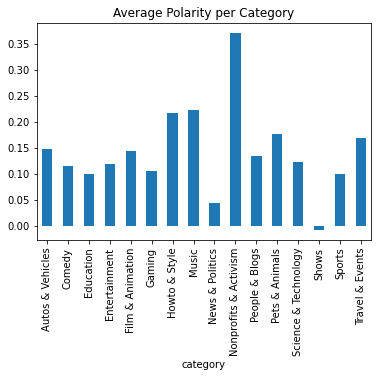

In [78]:
video_Last.groupby('category').polarity.mean().plot(kind="bar")
print(video_Last.groupby('category').polarity.mean())
plt.title("Average Polarity per Category")
plt.show()

# Correlation matrices category wise

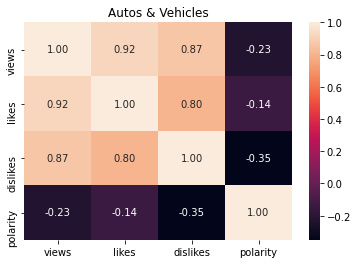

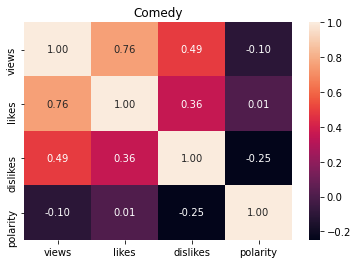

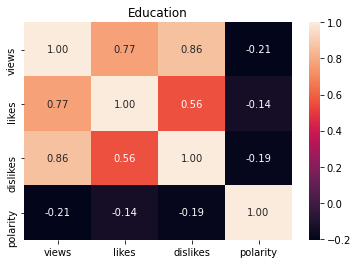

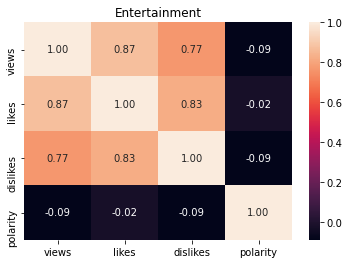

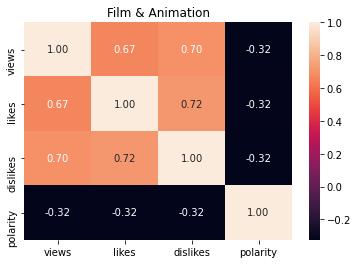

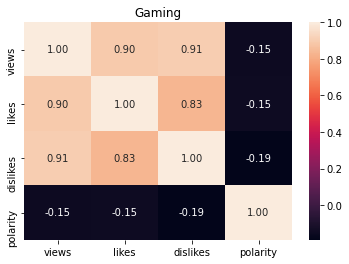

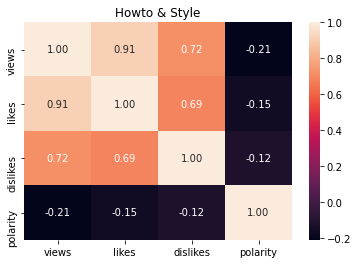

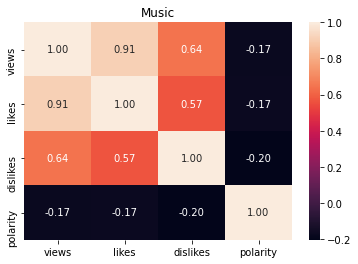

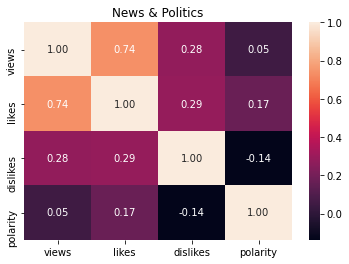

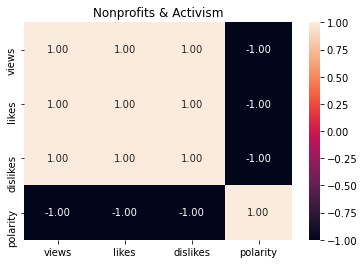

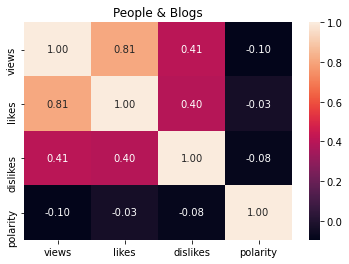

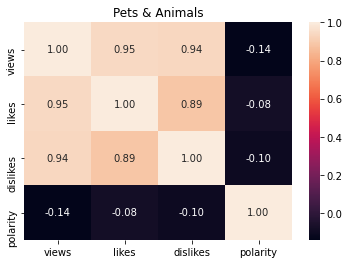

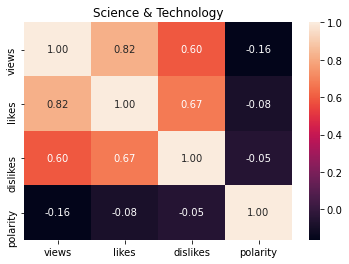

ValueError: zero-size array to reduction operation minimum which has no identity

In [79]:
for i, group in video_Last.groupby('category'):
    sns.heatmap(group[['views','likes','dislikes','polarity']].corr(), annot=True, fmt=".2f")
    plt.title(i)
    plt.show()

# Top 2 videos per category having the most positive comments

In [80]:
VDF = video_Last.sort_values('polarity', ascending=False).reset_index(drop=True)
VDF = VDF.groupby('category').head(2).reset_index(drop=True)
VDF[['category','title','channel_title','polarity']].sort_values('category', ascending=True).reset_index(drop=True)

category                                              title  \
0        Autos & Vehicles  First Tuned Run of Terry Mayhugh's Quarter Sca...   
1        Autos & Vehicles  The Ford GT drives the iconic Atlantic Ocean R...   
2                  Comedy  Kerry Washington Is Best Friends with the Obam...   
3                  Comedy   Atlas and Orion are just like all other siblings   
4               Education  Preserving the Migration of Giants: Guyana's A...   
5               Education                The Windmills of your Mind Illusion   
6           Entertainment         Little Shop of Horrors: The Director's Cut   
7           Entertainment  Why Sterling K. Brown Doesn't Rehearse With Hi...   
8        Film & Animation                          REVOLT - Official Trailer   
9        Film & Animation                  Building My Sukkah - Mayim Bialik   
10                 Gaming  How I Fixed a 10 Year Old Guitar Hero Bug With...   
11                 Gaming  (HD) Lindsey Stirling and Mark Ballas Cha-Cha-...   
12          Howto & Style                                 My EXCITING News!!   
13          Howto & Style                                My Mama Wears Timbs   
14                  Music  Charles Bradley as Black Velvet: A Tribute to ...   
15                  Music           Bailey Bryan - Too Good [Official Cover]   
16        News & Politics  Students From Baltimore's Cardinal Shehan Scho...   
17        News & Politics                         Dad Builds Palace For Dogs   
18  Nonprofits & Activism  Snoop Dogg Raps With Don Rickles | Dinner with...   
19  Nonprofits & Activism                            Stop Sextortion | Thorn   
20         People & Blogs                   TremorFreeMe suppression results   
21         People & Blogs  Tribeca TV Festival 2017 Oprah Shares What She...   
22         Pets & Animals                  Animal Adventure Park Giraffe Cam   
23         Pets & Animals  Husky Dog Adopts Stray Cat Saving Her Life | T...   
24   Science & Technology                       Arcus3D C1 - It moves, kinda   
25   Science & Technology                           Make PCB with a LCD mask   
26                  Shows    Pixel 2: Squeeze to access features (CNET News)   
27                 Sports            UCF Football: Space Game Uniform Reveal   
28                 Sports                            Flight log - Elevations   
29        Travel & Events  Dwight Howard Handles Ball up the Floor and ge...   
30        Travel & Events  30 Days Timelapse at Sea | 4K | Through Thunde...   

                  channel_title  polarity  
0                      mayhugh1  0.827692  
1                   Ford Europe  0.399387  
2   Late Night with Seth Meyers  0.425309  
3                     RM Videos  0.350000  
4                 thebrainscoop  0.322292  
5          The Illusion contest  0.718750  
6                 Fathom Events  1.000000  
7   E! Live from the Red Carpet  0.800000  
8     Vertical Entertainment LA  0.500000  
9                  Mayim Bialik  0.464964  
10                    ExileLord  0.290621  
11               Media Galactic  0.299075  
12                  Courtelizz1  0.560143  
13                     Ari Fitz  0.477520  
14               Eric Blattberg  0.752778  
15                 Bailey Bryan  0.616683  
16                CBS Baltimore  0.435019  
17                 Caters Clips  0.487500  
18                         AARP  0.299421  
19                        Thorn  0.444041  
20                Thomas Bikias  0.592188  
21               Xposure 365 TV  0.750000  
22        Animal Adventure Park  0.423646  
23                     The Dodo  0.361458  
24                     Arcus-3D  0.760417  
25               Ionel Ciobanuc  0.407341  
26                         CNET -0.008712  
27                  UCF Knights  0.756250  
28                       Gab707  0.434622  
29               Chris Goossens  0.235065  
30                       JeffHK  0.459233

# Top 2 videos per category having the least positive comments

In [81]:
VDF = video_Last.sort_values('polarity', ascending=True).reset_index(drop=True)
VDF = VDF.groupby('category').head(2).reset_index(drop=True)
VDF[['category','title','channel_title','polarity']].sort_values('category', ascending=True).reset_index(drop=True)

category                                              title  \
0        Autos & Vehicles  На учениях «Запад-2017» на полигоне в Леноблас...   
1        Autos & Vehicles  Last Week Tonight with John Oliver S04E23 - Se...   
2                  Comedy  Trevor Responds to the Las Vegas Shooting & Tr...   
3                  Comedy  John Oliver - Puerto Rico and Hospitalized Sen...   
4               Education  Announcement of the Nobel Prize in Chemistry 2017   
5               Education                  What Happened to Mad Cow Disease?   
6           Entertainment  Emmys 2017: 'This Is Us' Star Sterling K. Brow...   
7           Entertainment                      Best Tom Petty Interview Ever   
8        Film & Animation  Everything Wrong With Scream 2 In 19 Minutes O...   
9        Film & Animation  Everything Wrong With Alien: Covenant In 16 Mi...   
10                 Gaming  We Try Playing Grand Theft Auto 5 Without Brea...   
11                 Gaming                         Smash Up - English Trailer   
12          Howto & Style  The Legend Continues with Nas | Vol. VII | Tru...   
13          Howto & Style  EXCLUSIVE: HTC U11 Plus Leaked 360 Degree Renders   
14                  Music  Tommy Geez Finally out of Jail! (Cardi B ex & ...   
15                  Music  KATY PERRY GETS STUCK IN THE AIR AT HER CONCER...   
16        News & Politics     Mexico: More than 200 killed in 7.1 earthquake   
17        News & Politics  Video shows man clinging to front of moving sc...   
18  Nonprofits & Activism                            Stop Sextortion | Thorn   
19  Nonprofits & Activism  Snoop Dogg Raps With Don Rickles | Dinner with...   
20         People & Blogs            Unsafe bicycling no hands on handle bar   
21         People & Blogs  This cat just realised that he's been neutered...   
22         Pets & Animals                               Dog Spells Her Name!   
23         Pets & Animals             7. Teach the First Behavior: Targeting   
24   Science & Technology  Update on Gravitational Wave Science from the ...   
25   Science & Technology  Zapad 2017 || Russian Helicopter Kamov Ka-52 A...   
26                  Shows    Pixel 2: Squeeze to access features (CNET News)   
27                 Sports  Bart Deurloo (NED) Interview / High Bar Crash ...   
28                 Sports                  Mike Leach after practice Oct. 17   
29        Travel & Events  CHILD GETS HIT WITH TODD FRAZIER FOUL BALL LIN...   
30        Travel & Events                Organizer Gives You More Sink Space   

                                      channel_title  polarity  
0                                         Мегаполис -0.034029  
1                                      DeathByPixel -0.029366  
2                   The Daily Show with Trevor Noah -0.035530  
3                                          consumer -0.042626  
4                                       Nobel Prize -0.207146  
5                                           SciShow -0.050215  
6                             Entertainment Tonight -0.150000  
7                                  CrazyLaughAction -0.306250  
8                                        CinemaSins -0.055302  
9                                        CinemaSins -0.053770  
10                                     BuzzFeedBlue  0.020048  
11                                  Asmodee Digital -0.068750  
12                                       Timberland  0.025000  
13                                       Couponraja  0.003424  
14                                      Triz Cru TV  0.000000  
15                                   Dance with Dre -0.009436  
16                               Al Jazeera English -0.142639  
17                             WBAL-TV 11 Baltimore -0.134901  
18                                            Thorn  0.444041  
19                                             AARP  0.299421  
20                 Stop Bad Bicyclists In Wisconsin -0.110579  
21                                         World

# Top 20 Trending videos based on number of comments

Text(0, 0.5, 'Count')

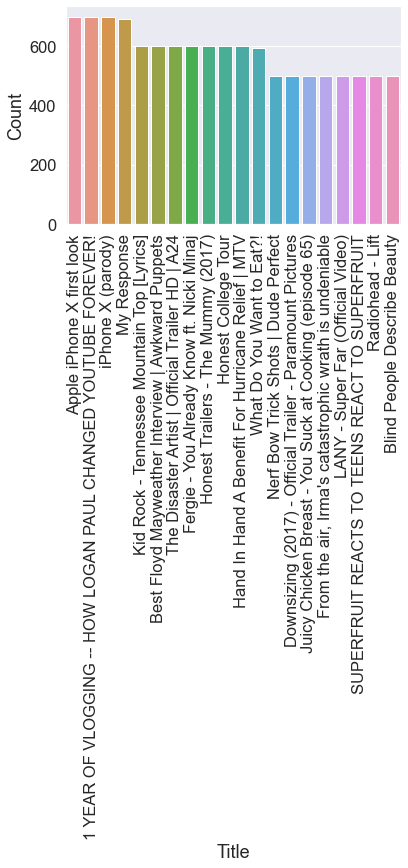

In [133]:
df_combined = pd.merge(videos.head(10000), comm.head(10000), on='video_id')
df_combined = df_combined.groupby('title').count().sort_values(by='comment_text',ascending=False).head(20)
sns.set(font_scale=1.5)
ax = sns.barplot(x=df_combined.index,y='comment_text',data=df_combined)
ax.set_xticklabels(labels=df_combined.index,rotation=90)
ax.set_xlabel('Title')
ax.set_ylabel('Count')

In [90]:
def form_hist(given_list,top_n):
    """
    Returns a sorted histogram dataframe (with top_n rows) for a given list.
    """
    item_set = set(given_list)
    items = []
    counts = []
    for nm in item_set:
        items.append(nm)
        counts.append(given_list.count(nm))
    return pd.DataFrame({'count':counts,'items':items}).sort_values(by='count',ascending=False).head(top_n)

 

def create_hist(videos, num, title):
    """
    Plots our histogram
    """
    all_tags = videos['tags'].map(lambda k: k.lower().split('|')).values
    all_tags = [item for sublist in all_tags for item in sublist]

 

    counts = form_hist(all_tags,num)
    counts.columns = ['count','tags']
    plt.figure()
    sns.barplot(x = counts['tags'], y = counts['count'])
    plt.xticks(rotation=90)
    plt.ylabel('count')
    plt.title(title)

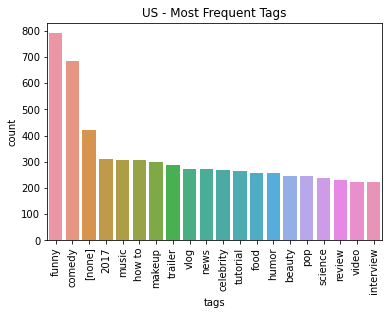

In [84]:
create_hist(videos,20,'US - Most Frequent Tags')